In [79]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns

import matplotlib.pyplot as plt

In [80]:
# read csv
df=pd.read_csv('./data/combined_output.csv', sep=';')
# drop incomplete rows
df = df.dropna()
# drop CID column
df = df.drop(columns=['CID'])
df

,MolecularWeight,XLogP,HBondDonorCount,HBondAcceptorCount
0,418.60,4.7,1,5
1,308.80,2.1,0,3
2,308.30,2.7,1,4
3,422.90,4.3,2,5
4,284.74,3.0,0,2
...,...,...,...,...
79,1093.30,0.3,16,18
80,390.22,-0.1,2,4
81,1239.40,-0.1,15,15
82,1431.00,1.9,16,16


In [81]:
# convert to numpy array
X = df.to_numpy()
X.shape

(83, 4)

# TSNE

In [82]:
# TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded

array([[-0.27038237, -2.5645218 ],
       [-2.032186  , -5.6215525 ],
       [-1.7777015 , -5.789966  ],
       [-0.206939  , -2.4866428 ],
       [-2.2478807 , -6.3948836 ],
       [-1.1949275 , -5.3791723 ],
       [-1.8789669 , -6.788079  ],
       [-0.85302675, -4.1365685 ],
       [-0.60998   , -3.1930852 ],
       [ 0.32469675, -1.6982317 ],
       [-2.636337  , -7.325666  ],
       [-2.4723012 , -7.499139  ],
       [-2.3402073 , -6.5624175 ],
       [-1.333118  , -5.799164  ],
       [-0.4572113 , -3.6350274 ],
       [-2.2446876 , -7.1698413 ],
       [-1.1949275 , -5.3791723 ],
       [-1.7177678 , -5.201372  ],
       [ 0.41674277, -1.6424037 ],
       [-1.6176411 , -6.3252006 ],
       [-1.4427471 , -4.9617987 ],
       [ 0.28184727, -2.3063529 ],
       [-0.6477043 , -3.6538544 ],
       [-1.4073399 , -6.0596123 ],
       [ 0.5952027 , -1.6763153 ],
       [-0.82400393, -4.1153407 ],
       [-2.0132093 , -6.9999986 ],
       [-2.5317504 , -7.592714  ],
       [-0.3682742 ,

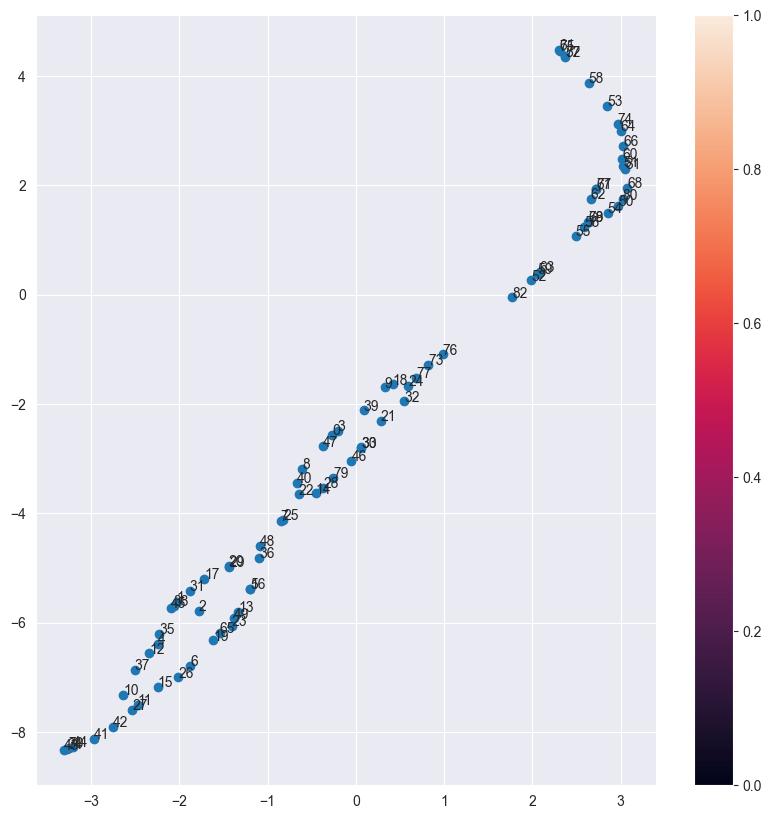

In [83]:
#plot results of TSNE
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1])
for i in range(X_embedded.shape[0]):
    plt.text(X_embedded[i,0], X_embedded[i,1], str(i))
plt.colorbar()
plt.show()


# DBSCAN

In [84]:
db = DBSCAN(eps=1, min_samples=2).fit(X_embedded)
labels = db.labels_

In [85]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 0


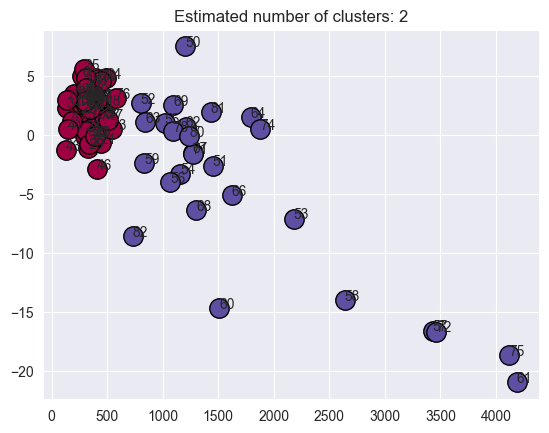

In [86]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    # Add descriptions for each sample
    for i, (x, y) in enumerate(zip(X[:, 0], X[:, 1])):
        if labels[i] == k:
            plt.text(x, y, i, fontsize=10)

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# KMeans

In [87]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_embedded)
labels = kmeans.predict(X_embedded)

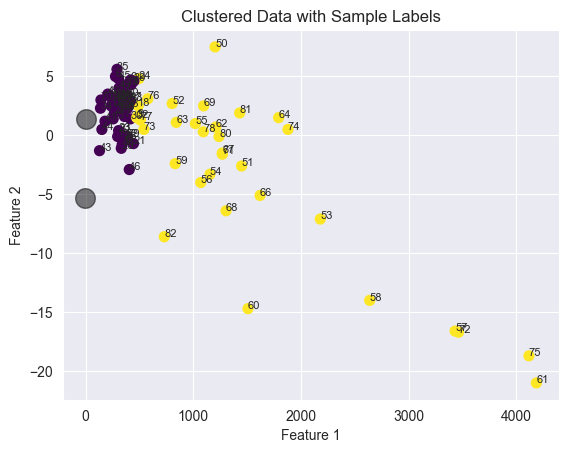

In [88]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# Add descriptions for each sample
for i, (x, y) in enumerate(zip(X[:, 0], X[:, 1])):
    plt.text(x, y, i, fontsize=8)

plt.title("Clustered Data with Sample Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [89]:
# get data from each cluster
cluster_map = pd.DataFrame(X)
cluster_map['cluster'] = labels

### Cluster 0

In [90]:
# add cluster number to the original dataframe
df['cluster'] = labels
#add cid column back
df['CID'] = pd.read_csv('./data/combined_output.csv', sep=';')['CID']
#add column names back
# get cluster 0
df_cluster_0 = df[df['cluster'] == 0]
df_cluster_0.to_csv('./data/cluster_0.csv', sep=';')
df_cluster_0


,MolecularWeight,XLogP,HBondDonorCount,HBondAcceptorCount,cluster,CID
0,418.60,4.7,1,5,0,54454
1,308.80,2.1,0,3,0,2118
2,308.30,2.7,1,4,0,54678486
3,422.90,4.3,2,5,0,3961
4,284.74,3.0,0,2,0,3016
5,324.40,3.2,0,4,0,2771
6,277.40,5.0,0,1,0,2160
7,360.40,1.6,3,5,0,5755
8,389.40,2.3,1,4,0,110635
10,239.74,3.2,1,2,0,444


### Cluster 1

In [91]:
df_cluster_1 = df[df['cluster'] == 1]
df_cluster_1.to_csv('./data/cluster_1.csv', sep=';')
df_cluster_1


,MolecularWeight,XLogP,HBondDonorCount,HBondAcceptorCount,cluster,CID
9,481.5,1.6,3,10,1,446157
18,488.6,2.5,1,8,1,135400189
24,494.0,4.8,3,5,1,3488
32,474.6,1.5,1,8,1,135398744
50,1202.6,7.5,5,12,1,5284373
51,1449.2,-2.6,19,26,1,14969
52,804.0,2.7,3,12,1,445643
53,2180.3,-7.1,28,35,1,16129704
54,1155.4,-3.3,18,18,1,5311054
55,1019.2,1.0,13,14,1,448601


# Radar chart (Source data)

In [92]:
theta = df.columns.values
rescale_vector=np.array([0.01, 1, 1, 1])
X_rescaled = X*rescale_vector
X_rescaled

array([[  4.186 ,   4.7   ,   1.    ,   5.    ],
       [  3.088 ,   2.1   ,   0.    ,   3.    ],
       [  3.083 ,   2.7   ,   1.    ,   4.    ],
       [  4.229 ,   4.3   ,   2.    ,   5.    ],
       [  2.8474,   3.    ,   0.    ,   2.    ],
       [  3.244 ,   3.2   ,   0.    ,   4.    ],
       [  2.774 ,   5.    ,   0.    ,   1.    ],
       [  3.604 ,   1.6   ,   3.    ,   5.    ],
       [  3.894 ,   2.3   ,   1.    ,   4.    ],
       [  4.815 ,   1.6   ,   3.    ,  10.    ],
       [  2.3974,   3.2   ,   1.    ,   2.    ],
       [  2.3627,   2.5   ,   1.    ,   1.    ],
       [  2.774 ,   2.9   ,   1.    ,   3.    ],
       [  3.124 ,   2.9   ,   1.    ,   4.    ],
       [  3.795 ,   4.3   ,   0.    ,   4.    ],
       [  2.5609,   1.4   ,   2.    ,   5.    ],
       [  3.244 ,   3.2   ,   0.    ,   4.    ],
       [  3.218 ,   3.8   ,   0.    ,   4.    ],
       [  4.886 ,   2.5   ,   1.    ,   8.    ],
       [  2.977 ,  -0.1   ,   3.    ,   7.    ],
       [  3.3134,  -

In [93]:
fig_0 = go.Figure(
    data=[go.Scatterpolar(r=row, theta=theta) for row in X_rescaled],
        layout=go.Layout(
        title=go.layout.Title(text='All compounds'),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]  # Specify the range for the radial axis
            )
        ),
        showlegend=True
    )
)
pyo.plot(fig_0, filename = 'fig_0.html')

'fig_0.html'

In [94]:
# get clustered substances and create bounding boxes based on kmeans and the other one
# plot just these two

# Radar + KMeans

In [95]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.predict(X)
# get data from each cluster
cluster_map = pd.DataFrame(X)
cluster_map['cluster'] = labels
cluster_map

,0,1,2,3,cluster
0,418.60,4.7,1.0,5.0,0
1,308.80,2.1,0.0,3.0,0
2,308.30,2.7,1.0,4.0,0
3,422.90,4.3,2.0,5.0,0
4,284.74,3.0,0.0,2.0,0
...,...,...,...,...,...
78,1093.30,0.3,16.0,18.0,0
79,390.22,-0.1,2.0,4.0,0
80,1239.40,-0.1,15.0,15.0,0
81,1431.00,1.9,16.0,16.0,0


In [96]:
# get cluster 0
cluster_0 = cluster_map[cluster_map['cluster'] == 0]
cluster_0

,0,1,2,3,cluster
0,418.60,4.7,1.0,5.0,0
1,308.80,2.1,0.0,3.0,0
2,308.30,2.7,1.0,4.0,0
3,422.90,4.3,2.0,5.0,0
4,284.74,3.0,0.0,2.0,0
...,...,...,...,...,...
78,1093.30,0.3,16.0,18.0,0
79,390.22,-0.1,2.0,4.0,0
80,1239.40,-0.1,15.0,15.0,0
81,1431.00,1.9,16.0,16.0,0


In [97]:
# get cluster 1
cluster_1 = cluster_map[cluster_map['cluster'] == 1]
cluster_1

,0,1,2,3,cluster
53,2180.3,-7.1,28.0,35.0,1
57,3431.9,-16.6,52.0,55.0,1
58,2639.2,-14.0,42.0,46.0,1
61,4187.0,-21.0,58.0,66.0,1
72,3464.0,-16.7,56.0,55.0,1
75,4118.0,-18.7,60.0,62.0,1


In [98]:
# plot radar chart for cluster 0
cluster_0_rescaled = cluster_0.drop(columns=['cluster']).to_numpy()*rescale_vector
fig_1 = go.Figure(
    data=[go.Scatterpolar(r=row, theta=theta) for row in cluster_0_rescaled],
        layout=go.Layout(
        title=go.layout.Title(text='Cluster 0 compounds'),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]  # Specify the range for the radial axis
            )
        ),
        showlegend=True
    )
)
pyo.plot(fig_1, filename = 'fig_1.html')
fig_1.write_image('./fig_1.png')

![alt text](./fig_1.png)

In [99]:
# plot radar chart for cluster 1
cluster_1_rescaled = cluster_1.drop(columns=['cluster']).to_numpy()*rescale_vector
fig_2 = go.Figure(
    data=[go.Scatterpolar(r=row, theta=theta) for row in cluster_1_rescaled],
        layout=go.Layout(
        title=go.layout.Title(text='Cluster 1 compounds'),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]  # Specify the range for the radial axis
            )
        ),
        showlegend=True
    )
)
pyo.plot(fig_2, filename = 'fig_2.html')
fig_2.write_image('./fig_2.png')

![alt text](./fig_2.png)

## Cluster 1 radar chart


In [100]:
# bounding box for cluster 0
cluster_0_min = cluster_0.drop(columns=['cluster']).min().values
cluster_0_max = cluster_0.drop(columns=['cluster']).max().values
# plot bounding box for cluster 0
fig_3 = go.Figure(
    data=[go.Scatterpolar(r=cluster_0_min*rescale_vector, theta=theta, mode='lines', name='min'),
          go.Scatterpolar(r=cluster_0_max*rescale_vector, theta=theta, mode='lines',fill='toself',fillcolor='rgba(0,100,80,0.2)', name='max')],
        layout=go.Layout(
        title=go.layout.Title(text='Cluster 0 bounding box'),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]  # Specify the range for the radial axis
            )
        ),
        showlegend=True
    )
)
pyo.plot(fig_3, filename = 'fig_3.html')
fig_3.write_image('./fig_3.png')

![alt text](./fig_3.png)

In [101]:
# bounding box for cluster 1
cluster_1_min = cluster_1.drop(columns=['cluster']).min().values
cluster_1_max = cluster_1.drop(columns=['cluster']).max().values
# plot bounding box for cluster 1
fig_4 = go.Figure(
    data=[go.Scatterpolar(r=cluster_1_min * rescale_vector, theta=theta, mode='lines', name='min'),
          go.Scatterpolar(r=cluster_1_max * rescale_vector, theta=theta, mode='lines', fill='toself',fillcolor='rgba(0,100,80,0.2)', name='max'),
          ],
    layout=go.Layout(
        title=go.layout.Title(text='Cluster 1 bounding box'),
        polar=dict(
            radialaxis=dict(
                visible=True,
            ),
        ),
        showlegend=True
    )
)
pyo.plot(fig_4, filename = 'fig_4.html')
fig_4.write_image('./fig_4.png')

![alt text](./fig_4.png)

In [102]:
fig_5 = go.Figure(
    data=[go.Scatterpolar(r=cluster_0_max * rescale_vector, theta=theta, mode='lines', fill='toself',fillcolor='rgba(0,100,80,0.2)', name='cluster 0'),
          go.Scatterpolar(r=cluster_1_max * rescale_vector, theta=theta, mode='lines', fill='toself',fillcolor='rgba(0,100,80,0.2)', name='cluster 1'),
          ],
    layout=go.Layout(
        title=go.layout.Title(text='Both cluster bounding boxes'),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]  # Specify the range for the radial axis
            )
        ),
        showlegend=True
    )
)
pyo.plot(fig_5)
fig_5.write_image('./fig_5.png')

![alt text](./fig_5.png)

## Kmeans + Violin plots


In [103]:
df

,MolecularWeight,XLogP,HBondDonorCount,HBondAcceptorCount,cluster,CID
0,418.60,4.7,1,5,0,54454
1,308.80,2.1,0,3,0,2118
2,308.30,2.7,1,4,0,54678486
3,422.90,4.3,2,5,0,3961
4,284.74,3.0,0,2,0,3016
...,...,...,...,...,...,...
79,1093.30,0.3,16,18,1,16119814
80,390.22,-0.1,2,4,0,24801581
81,1239.40,-0.1,15,15,1,50225
82,1431.00,1.9,16,16,1,25074887


In [104]:
df_copy = df.copy()
# Rescale 'MolecularWeight' column by 0.01
df_copy['MolecularWeight'] = df_copy['MolecularWeight'] * 0.01
df_copy

,MolecularWeight,XLogP,HBondDonorCount,HBondAcceptorCount,cluster,CID
0,4.1860,4.7,1,5,0,54454
1,3.0880,2.1,0,3,0,2118
2,3.0830,2.7,1,4,0,54678486
3,4.2290,4.3,2,5,0,3961
4,2.8474,3.0,0,2,0,3016
...,...,...,...,...,...,...
79,10.9330,0.3,16,18,1,16119814
80,3.9022,-0.1,2,4,0,24801581
81,12.3940,-0.1,15,15,1,50225
82,14.3100,1.9,16,16,1,25074887


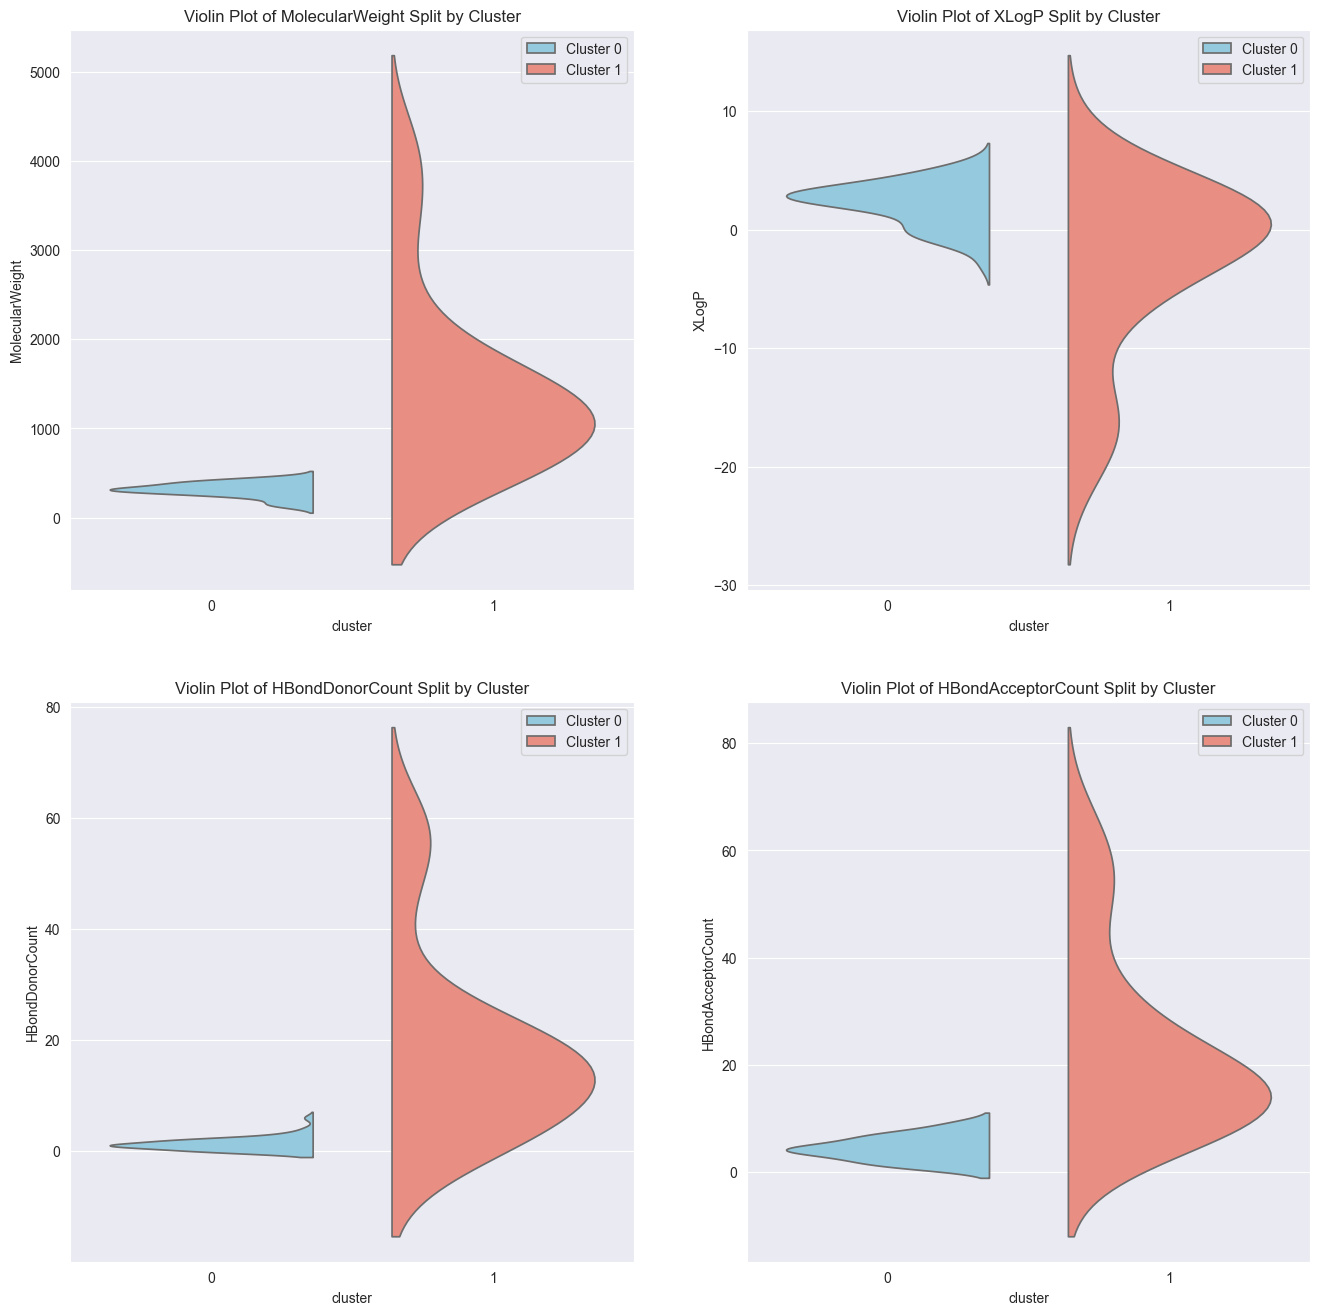

In [128]:
plt.figure(figsize=(16, 16))  # Adjust figure size as needed

# List of columns to plot
columns_to_plot = ['MolecularWeight', 'XLogP', 'HBondDonorCount', 'HBondAcceptorCount']

# Loop through each column
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 2, i)  # Create subplot
    # Plotting split violins for each cluster
    sns.violinplot(data=df, x=df['cluster'], y=column, hue='cluster', split=True, inner=None, palette={0: 'skyblue', 1: 'salmon'}, gap=.1)
    # Set labels and title
    plt.title(f'Violin Plot of {column} Split by Cluster')
    # Add legend
    plt.legend(labels=['Cluster 0', 'Cluster 1'])

plt.show()